<a href="https://colab.research.google.com/github/Pramilas123/Parkinson-s-Disease-Detection-via-Vocal-Biomarkers/blob/main/Copy_of_Final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEST CODE1**

In [ ]:
#importing pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Data collection and processing
Parkinson_data = pd.read_csv('/content/Dataset - Sheet2.csv')


In [ ]:
#Print first 5 rows of the dataset
Parkinson_data.head()

,name,Jitter:DDP,Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,D2,PPE
0,S1,0.01109,0.02182,0.03130,0.06545,0.02211,21.033,1,0.414783,0.815285,2.301442,0.284654
1,S2,0.01394,0.03134,0.04518,0.09403,0.01929,19.085,1,0.458359,0.819521,2.486855,0.368674
2,S3,0.01633,0.02757,0.03858,0.08270,0.01309,20.651,1,0.429895,0.825288,2.342259,0.332634
3,S4,0.01505,0.02924,0.04005,0.08771,0.01353,20.644,1,0.434969,0.819235,2.405554,0.368975
4,S5,0.01966,0.03490,0.04825,0.10470,0.01767,19.649,1,0.417356,0.823484,2.332180,0.410335


In [ ]:
#number of rows and columns in the dataset
Parkinson_data.shape

(195, 12)

In [ ]:
#checking for missing values
Parkinson_data.isnull().sum()

,0
name,0
Jitter:DDP,0
Shimmer:APQ3,0
Shimmer:APQ5,0
Shimmer:DDA,0
NHR,0
HNR,0
status,0
RPDE,0
DFA,0


In [ ]:
Parkinson_data['status'].value_counts()

,count
status,
1,147
0,48


1-> Parkinson 0-> Healthy

In [ ]:
#spliting the features and target
X=Parkinson_data.drop(columns = ['name', 'status'], axis=1)
y=Parkinson_data['status']

In [ ]:
X.head()

,Jitter:DDP,Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,RPDE,DFA,D2,PPE
0,0.01109,0.02182,0.03130,0.06545,0.02211,21.033,0.414783,0.815285,2.301442,0.284654
1,0.01394,0.03134,0.04518,0.09403,0.01929,19.085,0.458359,0.819521,2.486855,0.368674
2,0.01633,0.02757,0.03858,0.08270,0.01309,20.651,0.429895,0.825288,2.342259,0.332634
3,0.01505,0.02924,0.04005,0.08771,0.01353,20.644,0.434969,0.819235,2.405554,0.368975
4,0.01966,0.03490,0.04825,0.10470,0.01767,19.649,0.417356,0.823484,2.332180,0.410335


In [ ]:
y.head()

,status
0,1
1,1
2,1
3,1
4,1


In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify = y, random_state=2)

In [ ]:
print(X.shape,X_train.shape, X_test.shape)

(195, 10) (156, 10) (39, 10)


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
print(X_train)

[[-5.89488477e-01 -8.47784410e-01 -7.16062765e-01 ... -9.76021420e-01
   3.67380761e-01 -1.01626972e-01]
 [-5.29683965e-01  4.69834335e-01  2.12040200e-01 ... -1.04854884e+00
   2.30410182e-01  7.25430092e-03]
 [-5.51213589e-01 -6.95866047e-01 -6.10596519e-01 ...  6.28307108e-01
  -1.27562573e+00 -5.03037967e-01]
 ...
 [ 4.33168683e-01  1.87842079e-01  2.96428798e-04 ...  3.46143932e-01
   5.94403638e-01 -2.56870663e-01]
 [ 2.09499807e-01 -2.40110957e-01 -3.37195558e-01 ... -8.93866150e-01
  -9.18334164e-01 -4.43401072e-01]
 [-8.22726075e-01 -1.06065343e-01 -2.08202227e-01 ... -1.60296417e+00
   5.12603529e-01 -5.39510027e-01]]


In [ ]:
#comparing the performance of the models
models = [LogisticRegression(max_iter=1000),SVC(kernel = 'linear'),KNeighborsClassifier(),RandomForestClassifier()]
def compare_models_train_test():
  for model in models:
    model.fit(X_train, y_train)
    test_data_prediction = model.predict(X_test)
    pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, pred_train)
    accuracy = accuracy_score(y_test,test_data_prediction)
    print ('TestAccuracy score of the ', model, '=',accuracy)
    print('Train_Accuracy score of the ', model, '=',train_accuracy)


In [ ]:
compare_models_train_test()

TestAccuracy score of the  LogisticRegression(max_iter=1000) = 0.8461538461538461
Train_Accuracy score of the  LogisticRegression(max_iter=1000) = 0.8717948717948718
TestAccuracy score of the  SVC(kernel='linear') = 0.8205128205128205
Train_Accuracy score of the  SVC(kernel='linear') = 0.8653846153846154
TestAccuracy score of the  KNeighborsClassifier() = 0.8717948717948718
Train_Accuracy score of the  KNeighborsClassifier() = 0.9358974358974359
TestAccuracy score of the  RandomForestClassifier() = 0.8717948717948718
Train_Accuracy score of the  RandomForestClassifier() = 1.0


In [ ]:
#Cross Validation
#For  Logistic Regression
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000),X,y,cv=5)
print(cv_score_lr)
mean_accuracy_lr = sum(cv_score_lr)/ len(cv_score_lr)
mean_accuracy_lr = round(mean_accuracy_lr,2)
print(mean_accuracy_lr)

[0.92307692 0.79487179 0.66666667 0.74358974 0.74358974]
0.77


In [ ]:
#Cross Validation
#For support vector classifier
cv_score_svc = cross_val_score(SVC(kernel='linear'),X,y,cv=5)
print(cv_score_svc)
mean_accuracy_svc = sum(cv_score_svc)/ len(cv_score_svc)
mean_accuracy_svc = round(mean_accuracy_svc,2)
print(mean_accuracy_svc)

[0.76923077 0.76923077 0.74358974 0.74358974 0.74358974]
0.75


In [ ]:
#creating a function to compare the models
models = [LogisticRegression(max_iter=1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]
def compare_models_cross_validation():
  for model in models:
   cv_score = cross_val_score(model,X,y,cv=5)
   mean_accuracy = sum (cv_score)/len(cv_score)
   mean_accuracy = mean_accuracy * 100
   mean_accuracy = round(mean_accuracy,2)
   print('cross validation accuracies for the', model, '=',cv_score)
   print('Accuracy % of the', model, mean_accuracy)
   print('----------------')

In [ ]:
compare_models_cross_validation()

cross validation accuracies for the LogisticRegression(max_iter=1000) = [0.92307692 0.79487179 0.66666667 0.74358974 0.74358974]
Accuracy % of the LogisticRegression(max_iter=1000) 77.44
----------------
cross validation accuracies for the SVC(kernel='linear') = [0.76923077 0.76923077 0.74358974 0.74358974 0.74358974]
Accuracy % of the SVC(kernel='linear') 75.38
----------------
cross validation accuracies for the KNeighborsClassifier() = [0.64102564 0.74358974 0.74358974 0.74358974 0.71794872]
Accuracy % of the KNeighborsClassifier() 71.79
----------------
cross validation accuracies for the RandomForestClassifier() = [0.69230769 0.82051282 0.82051282 0.76923077 0.71794872]
Accuracy % of the RandomForestClassifier() 76.41
----------------


In [ ]:

#GridsearchCV
model = SVC()
#hyperparameters
parameters = {'kernel': ['linear','poly','rbf','sigmoid'],'C':[1,5,10,20]}
#gridsearch
classifier = GridSearchCV(model,parameters,cv=5)
#fitting the data to the model
classifier.fit(X_train,y_train)
classifier.cv_results_



{'mean_fit_time': array([0.00270472, 0.00183578, 0.00188818, 0.00196977, 0.00224142,
        0.00205245, 0.00354824, 0.00197921, 0.00325136, 0.00193677,
        0.00206804, 0.00184078, 0.00509048, 0.00253034, 0.00221887,
        0.00180554]),
 'std_fit_time': array([8.23726586e-04, 6.06819828e-05, 4.21459314e-05, 3.74158899e-05,
        1.76702456e-04, 3.15026777e-04, 7.98140009e-04, 1.88804851e-04,
        5.28461122e-04, 6.07716939e-05, 1.09307781e-04, 1.16722626e-04,
        1.43270613e-03, 3.81879944e-04, 1.45007160e-04, 4.28057968e-05]),
 'mean_score_time': array([0.00123968, 0.00099673, 0.00111923, 0.00103993, 0.00097041,
        0.00126481, 0.0016325 , 0.00104551, 0.00121069, 0.00100331,
        0.00111771, 0.00099983, 0.00112476, 0.00130024, 0.00135217,
        0.00100617]),
 'std_score_time': array([3.17728217e-04, 3.65978654e-05, 1.39348805e-04, 1.22709390e-05,
        2.82895072e-05, 4.97843136e-04, 2.65343465e-04, 7.52752663e-05,
        2.44375903e-04, 3.09729135e-05, 1.36

In [ ]:
# Get the best score
best_score = classifier.best_score_
print("Best Score: ", best_score)

# Get the mean test scores and corresponding hyperparameters
mean_test_scores = classifier.cv_results_['mean_test_score']
params = classifier.cv_results_['params']

# Print the mean test scores with their hyperparameters
for mean_score, param in zip(mean_test_scores, params):
    print(f"Mean Test Score: {mean_score:.4f} for Hyperparameters: {param}")

Best Score:  0.8651209677419356
Mean Test Score: 0.8464 for Hyperparameters: {'C': 1, 'kernel': 'linear'}
Mean Test Score: 0.7821 for Hyperparameters: {'C': 1, 'kernel': 'poly'}
Mean Test Score: 0.8401 for Hyperparameters: {'C': 1, 'kernel': 'rbf'}
Mean Test Score: 0.8528 for Hyperparameters: {'C': 1, 'kernel': 'sigmoid'}
Mean Test Score: 0.8528 for Hyperparameters: {'C': 5, 'kernel': 'linear'}
Mean Test Score: 0.8270 for Hyperparameters: {'C': 5, 'kernel': 'poly'}
Mean Test Score: 0.8335 for Hyperparameters: {'C': 5, 'kernel': 'rbf'}
Mean Test Score: 0.8077 for Hyperparameters: {'C': 5, 'kernel': 'sigmoid'}
Mean Test Score: 0.8464 for Hyperparameters: {'C': 10, 'kernel': 'linear'}
Mean Test Score: 0.8206 for Hyperparameters: {'C': 10, 'kernel': 'poly'}
Mean Test Score: 0.8651 for Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Mean Test Score: 0.8075 for Hyperparameters: {'C': 10, 'kernel': 'sigmoid'}
Mean Test Score: 0.8401 for Hyperparameters: {'C': 20, 'kernel': 'linear'}
Mean Test Sco

In [ ]:

#GridsearchCV
model_list = [LogisticRegression(max_iter = 1000),SVC(), KNeighborsClassifier(),RandomForestClassifier(random_state = 0)]
#hyperparameters
parameters = {'log_reg_hyperparameters':{'C':[1,5,10,20]},'SVC_hyperparameters':{'kernel': ['linear','poly','rbf','sigmoid'],'C':[1,5,10,20]},'KNN-hyperparameters':{'n_neighbors':[3,5,10]},'random_forest_hyperparameters':{'n_estimators':[10,20,50,100]}}



In [ ]:
type(parameters)


dict

In [ ]:
print(parameters.keys())

dict_keys(['log_reg_hyperparameters', 'SVC_hyperparameters', 'KNN-hyperparameters', 'random_forest_hyperparameters'])


In [ ]:
parameters['SVC_hyperparameters']

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}

In [ ]:
model_keys = list(parameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'SVC_hyperparameters', 'KNN-hyperparameters', 'random_forest_hyperparameters']


In [ ]:
model_keys[0]

'log_reg_hyperparameters'

In [ ]:
parameters[model_keys[0]]

{'C': [1, 5, 10, 20]}

In [ ]:
#Defining function to apply gridsearch
def ModelSelection(list_of_models,parameters_dictionary):
  result= []
  i = 0
  for model in list_of_models:
     key = model_keys[i]
     params = parameters_dictionary[key]
     i+= 1
     print (model)
     print(params)
     print('----------------------')
     classifier = GridSearchCV(model,params,cv=5)
     classifier.fit(X_train,y_train)
     result.append({
    'model used': model,
    'highest score':classifier.best_score_,

    'best parameters': classifier.best_params_})

     result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best parameters'])
  return result_dataframe

In [ ]:
ModelSelection(model_list,parameters)


LogisticRegression(max_iter=1000)
{'C': [1, 5, 10, 20]}
----------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
----------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
----------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
----------------------


,model used,highest score,best parameters
0,LogisticRegression(max_iter=1000),0.846371,{'C': 5}
1,SVC(),0.865121,"{'C': 10, 'kernel': 'rbf'}"
2,KNeighborsClassifier(),0.897379,{'n_neighbors': 3}
3,RandomForestClassifier(random_state=0),0.859073,{'n_estimators': 20}


# **Hyperparameter Tuning - gridsearch- best score to find best parameters**

In [ ]:
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Sample data
Parkinson_data = pd.read_csv('/content/Dataset - Sheet2.csv')
X=Parkinson_data.drop(columns = ['name', 'status'], axis=1)
y=Parkinson_data['status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify = y, random_state=2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# Model list
model_list = [
    LogisticRegression(max_iter=1000),
    SVC(),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=0)
]

# Hyperparameters for each model (keys fixed to match the model)
parameters = {
    'LogisticRegression': {'C': [1, 5, 10, 20]},
    'SVC': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 10]},
    'RandomForestClassifier': {'n_estimators': [10, 20, 50, 100]}
}

model_keys = list(parameters.keys())

# Defining the function to apply GridSearch and print results
def ModelSelection(list_of_models, parameters_dictionary, X_train, y_train):
    result = []
    i = 0
    for i, model in enumerate(list_of_models):
        # Get the model name as a string
        model_name = model.__class__.__name__

        # Check if the model name is correctly in the parameters dictionary
        if model_name not in parameters_dictionary:
            print(f"Error: Model name '{model_name}' not found in parameters dictionary.")
            continue

        # Get corresponding hyperparameters
        params = parameters_dictionary[model_name]

        print(f'Model: {model_name}')
        print(f'Parameters: {params}')
        print('----------------------')

        # Apply GridSearchCV
        classifier = GridSearchCV(model, params, cv=5)
        classifier.fit(X_train, y_train)

        # Append the result
        result.append({
            'model used': model_name,
            'highest score': classifier.best_score_,
            'best parameters': classifier.best_params_
        })

        # Print accuracy for each model
        print(f"Best accuracy for {model_name}: {classifier.best_score_}")
        print(f"Best parameters for {model_name}: {classifier.best_params_}")
        print('----------------------')

    # Convert results to DataFrame
    result_dataframe = pd.DataFrame(result, columns=['model used', 'highest score', 'best parameters'])

    return result_dataframe
    # Call the function and print accuracies
results_df = ModelSelection(model_list, parameters, X_train, y_train)

Model: LogisticRegression
Parameters: {'C': [1, 5, 10, 20]}
----------------------
Best accuracy for LogisticRegression: 0.8463709677419354
Best parameters for LogisticRegression: {'C': 5}
----------------------
Model: SVC
Parameters: {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
----------------------
Best accuracy for SVC: 0.8651209677419356
Best parameters for SVC: {'C': 10, 'kernel': 'rbf'}
----------------------
Model: KNeighborsClassifier
Parameters: {'n_neighbors': [3, 5, 10]}
----------------------
Best accuracy for KNeighborsClassifier: 0.8973790322580646
Best parameters for KNeighborsClassifier: {'n_neighbors': 3}
----------------------
Model: RandomForestClassifier
Parameters: {'n_estimators': [10, 20, 50, 100]}
----------------------
Best accuracy for RandomForestClassifier: 0.8590725806451613
Best parameters for RandomForestClassifier: {'n_estimators': 20}
----------------------


# **Train the models with best Parameters- Accuracy, Precision,F1-score for testing & training**

Model: LogisticRegression
Parameters: {'C': [1, 5, 10, 20]}
----------------------
Best accuracy for LogisticRegression: 0.8463709677419354
Best parameters for LogisticRegression: {'C': 5}
Training accuracy for LogisticRegression: 0.8717948717948718
Test accuracy for LogisticRegression: 0.8205128205128205
Training precision for LogisticRegression: 0.9016393442622951
Test precision for LogisticRegression: 0.8666666666666667
Training recall for LogisticRegression: 0.9322033898305084
Test recall for LogisticRegression: 0.896551724137931
Training F1 score for LogisticRegression: 0.9166666666666666
Test F1 score for LogisticRegression: 0.8813559322033898
----------------------
Model: SVC
Parameters: {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
----------------------
Best accuracy for SVC: 0.8651209677419356
Best parameters for SVC: {'C': 10, 'kernel': 'rbf'}
Training accuracy for SVC: 0.9743589743589743
Test accuracy for SVC: 0.9487179487179487
Training precision fo

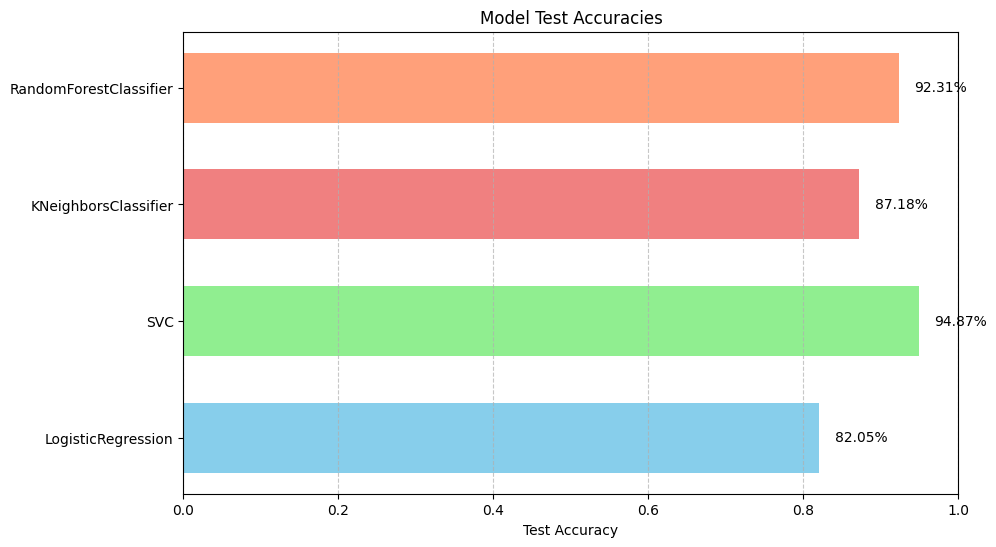

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Sample data
Parkinson_data = pd.read_csv('/content/Dataset - Sheet2.csv')
X = Parkinson_data.drop(columns=['name', 'status'], axis=1)
y = Parkinson_data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model list
model_list = [
    LogisticRegression(max_iter=1000),
    SVC(),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=0)
]

# Hyperparameters for each model (keys fixed to match the model)
parameters = {
    'LogisticRegression': {'C': [1, 5, 10, 20]},
    'SVC': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 10]},
    'RandomForestClassifier': {'n_estimators': [10, 20, 50, 100]}
}

# Defining the function to apply GridSearch and print results
def ModelSelection(list_of_models, parameters_dictionary, X_train, y_train, X_test, y_test):
    results = []
    for model in list_of_models:
        # Get the model name as a string
        model_name = model.__class__.__name__

        # Check if the model name is correctly in the parameters dictionary
        if model_name not in parameters_dictionary:
            print(f"Error: Model name '{model_name}' not found in parameters dictionary.")
            continue

        # Get corresponding hyperparameters
        params = parameters_dictionary[model_name]

        print(f'Model: {model_name}')
        print(f'Parameters: {params}')
        print('----------------------')

        # Apply GridSearchCV
        classifier = GridSearchCV(model, params, cv=5)
        classifier.fit(X_train, y_train)

        # Best model from GridSearchCV
        best_model = classifier.best_estimator_

        # Predict on training and test sets
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate accuracy
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Calculate precision, recall, and F1 score
        train_precision = precision_score(y_train, y_train_pred)
        test_precision = precision_score(y_test, y_test_pred)
        train_recall = recall_score(y_train, y_train_pred)
        test_recall = recall_score(y_test, y_test_pred)
        train_f1 = f1_score(y_train, y_train_pred)
        test_f1 = f1_score(y_test, y_test_pred)

        # Append the result
        results.append({
            'model used': model_name,
            'highest score': classifier.best_score_,
            'best parameters': classifier.best_params_,
            'train accuracy': train_accuracy,
            'test accuracy': test_accuracy,
            'train precision': train_precision,
            'test precision': test_precision,
            'train recall': train_recall,
            'test recall': test_recall,
            'train f1': train_f1,
            'test f1': test_f1
        })

        # Print accuracy for each model
        print(f"Best accuracy for {model_name}: {classifier.best_score_}")
        print(f"Best parameters for {model_name}: {classifier.best_params_}")
        print(f"Training accuracy for {model_name}: {train_accuracy}")
        print(f"Test accuracy for {model_name}: {test_accuracy}")
        print(f"Training precision for {model_name}: {train_precision}")
        print(f"Test precision for {model_name}: {test_precision}")
        print(f"Training recall for {model_name}: {train_recall}")
        print(f"Test recall for {model_name}: {test_recall}")
        print(f"Training F1 score for {model_name}: {train_f1}")
        print(f"Test F1 score for {model_name}: {test_f1}")
        print('----------------------')

    return pd.DataFrame(results)

# Call the function and get the results
results_df = ModelSelection(model_list, parameters, X_train, y_train, X_test, y_test)

# Plotting the test accuracies
def plot_test_accuracies(result_dataframe):
    plt.figure(figsize=(10, 6))
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']
    bars = plt.barh(result_dataframe['model used'], result_dataframe['test accuracy'],
                    color=colors, height=0.6, edgecolor='none')

    plt.xlabel('Test Accuracy')
    plt.title('Model Test Accuracies')
    plt.xlim(0, 1)  # Adjust if scores exceed 1

    # Adding accuracy percentages as labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
                 f'{width:.2%}', ha='left', va='center', fontsize=10)

    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Call the plotting function
plot_test_accuracies(results_df)


# **Feature Importance-SVM,LR,RF,KNN**

Feature importance for LogisticRegression: [0.10333035 0.18247239 0.3376911  0.18203899 0.24133216 0.30087996
 0.08463367 0.44442361 0.89045313 1.88882729]


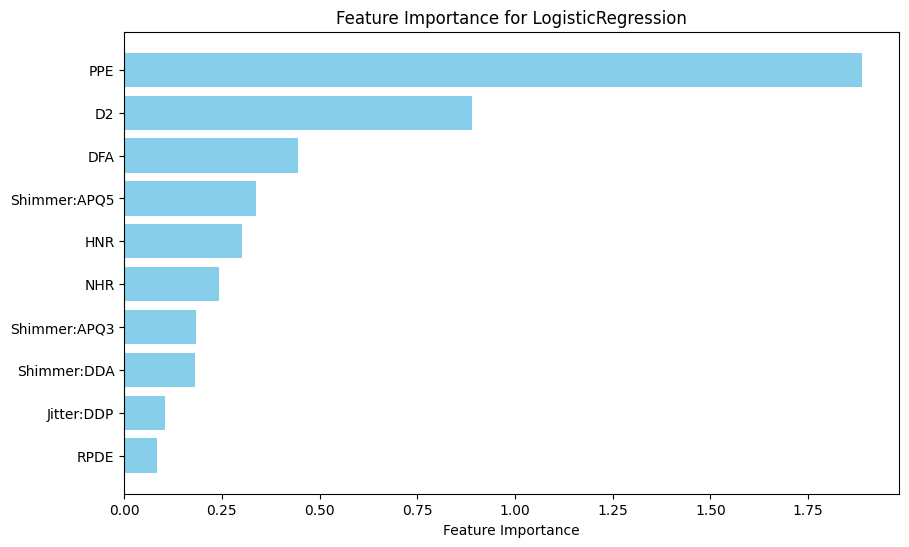

Using permutation importance for SVC
Feature importance for SVC: [-0.0025641   0.01282051  0.01538462  0.01282051  0.         -0.0025641
  0.00512821  0.04615385 -0.02307692  0.06666667]


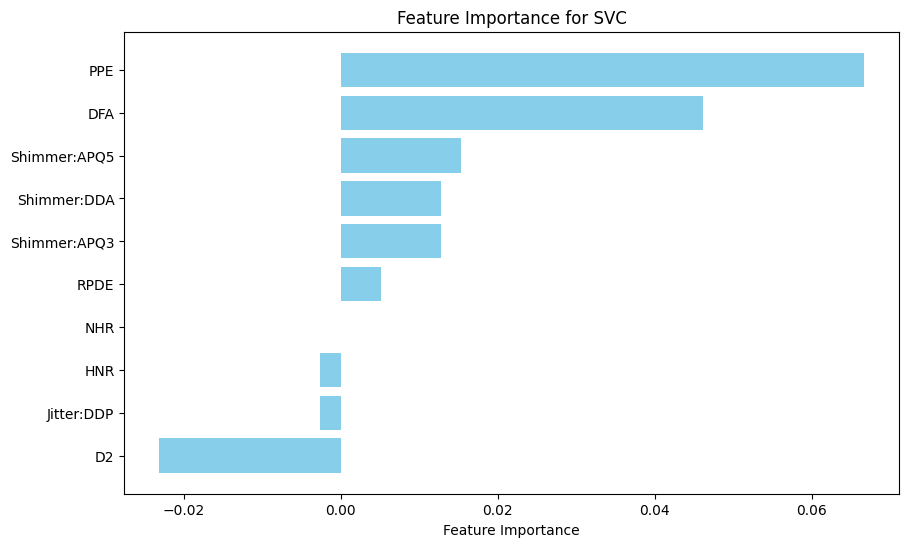

Using permutation importance for KNeighborsClassifier
Feature importance for KNeighborsClassifier: [ 2.56410256e-03 -2.56410256e-03  5.12820513e-03 -2.56410256e-03
  2.56410256e-03  2.22044605e-17  2.56410256e-02  7.43589744e-02
  1.02564103e-02  5.64102564e-02]


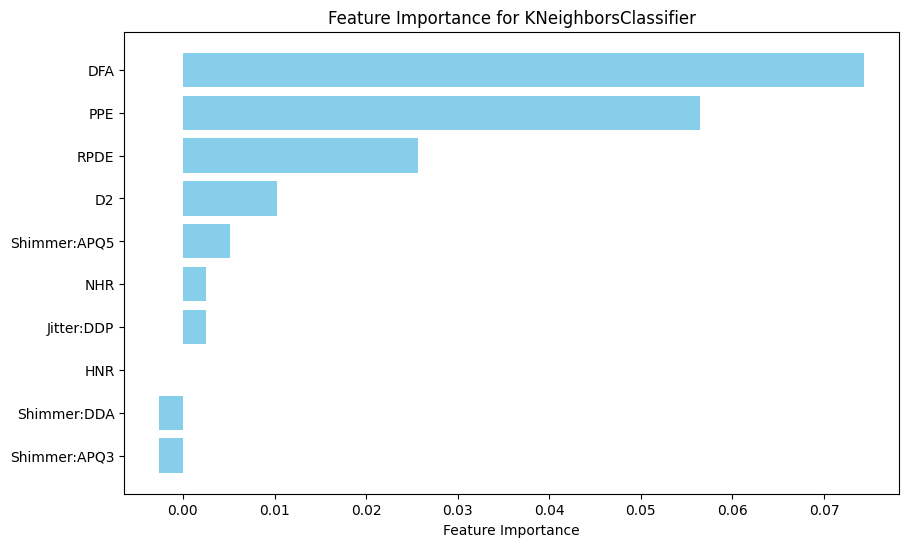

Feature importance for RandomForestClassifier: [0.08713109 0.06151409 0.0848977  0.05986338 0.08676274 0.06320977
 0.08510753 0.06608082 0.0955119  0.30992099]


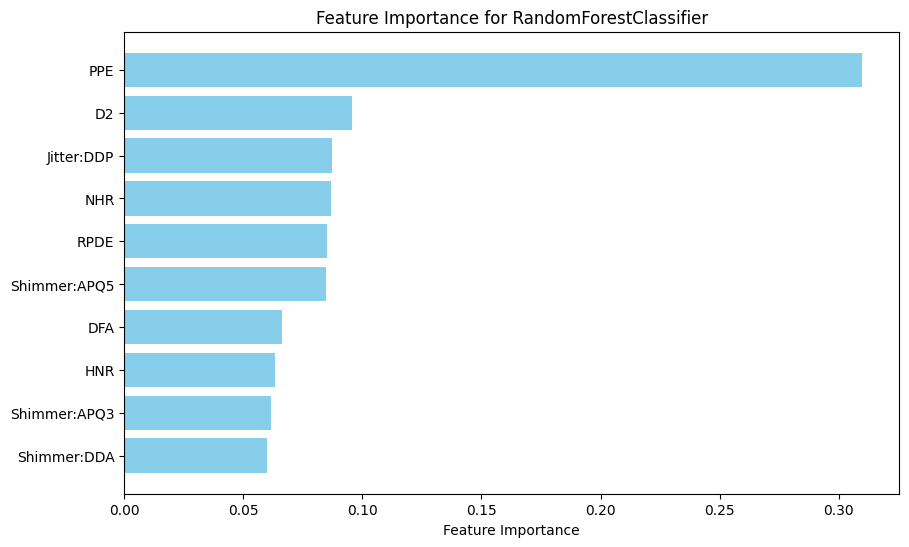

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

def plot_feature_importance(importances, feature_names, model_name):
    indices = np.argsort(importances)[::-1]  # Sort features by importance

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(importances)), importances[indices], align="center", color="skyblue")
    plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importance for {model_name}")
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.show()

def feature_contributions(models, X_train, y_train, X_test, y_test):
    for model in models:
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)

        # Check for feature importance attributes
        if hasattr(model, "coef_"):  # For models like Logistic Regression, SVC with linear kernel
            importances = np.abs(model.coef_[0])
            print(f"Feature importance for {model_name}: {importances}")
            plot_feature_importance(importances, X.columns, model_name)

        elif hasattr(model, "feature_importances_"):  # For models like RandomForest
            importances = model.feature_importances_
            print(f"Feature importance for {model_name}: {importances}")
            plot_feature_importance(importances, X.columns, model_name)

        else:
            # Apply permutation importance for models without native feature importance
            print(f"Using permutation importance for {model_name}")
            result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
            importances = result.importances_mean
            print(f"Feature importance for {model_name}: {importances}")
            plot_feature_importance(importances, X.columns, model_name)

# Call the feature_contributions function
feature_contributions(model_list, X_train, y_train, X_test, y_test)


# **Ensemble method for combining an SVM and a Random Forest - Voting Classifier**

SVM - Accuracy: 0.95, Recall: 0.97, Precision: 0.97, F1 Score: 0.97
Random Forest - Accuracy: 0.92, Recall: 0.97, Precision: 0.93, F1 Score: 0.95
Ensemble - Accuracy: 0.92, Recall: 1.00, Precision: 0.91, F1 Score: 0.95


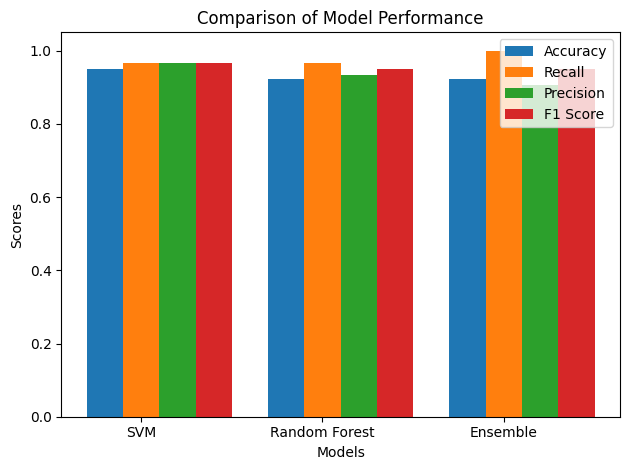

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
Parkinson_data = pd.read_csv('/content/Dataset - Sheet2.csv')
X = Parkinson_data.drop(columns=['name', 'status'], axis=1)
y = Parkinson_data['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Scale the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Define the models with the best parameters
svm = SVC(C=10, kernel='rbf', probability=True)
rf = RandomForestClassifier(n_estimators=20, random_state=0)

# Train the models
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Combine the models using Voting Classifier
ensemble = VotingClassifier(estimators=[('svm', svm), ('rf', rf)], voting='soft')
ensemble.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, Precision: {precision:.2f}, F1 Score: {f1:.2f}")
    return accuracy, recall, precision, f1

accuracy_svm, recall_svm, precision_svm, f1_svm = evaluate_model(y_test, y_pred_svm, "SVM")
accuracy_rf, recall_rf, precision_rf, f1_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")
accuracy_ensemble, recall_ensemble, precision_ensemble, f1_ensemble = evaluate_model(y_test, y_pred_ensemble, "Ensemble")

# Plot the comparison graph
models = ['SVM', 'Random Forest', 'Ensemble']
accuracies = [accuracy_svm, accuracy_rf, accuracy_ensemble]
recalls = [recall_svm, recall_rf, recall_ensemble]
precisions = [precision_svm, precision_rf, precision_ensemble]
f1_scores = [f1_svm, f1_rf, f1_ensemble]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, accuracies, width, label='Accuracy')
rects2 = ax.bar(x, recalls, width, label='Recall')
rects3 = ax.bar(x + width, precisions, width, label='Precision')
rects4 = ax.bar(x + 2*width, f1_scores, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()


# **Confusion matrix of hybrid model**

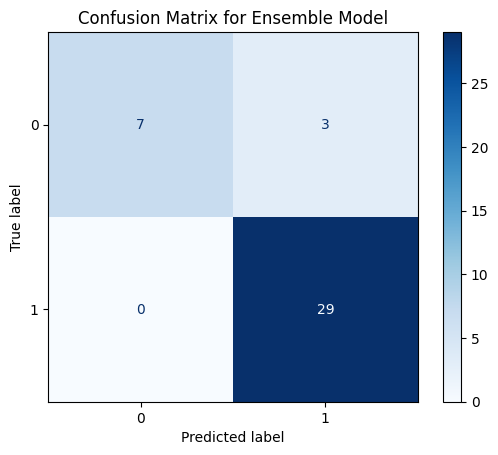

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ensemble.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Ensemble Model')
plt.show()
